LSTM 

References are stated in READ.me
 


In [ ]:
#--------------------------------------------------------
# Imports
#--------------------------------------------------------
%tensorflow_version 1.x
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
from keras.models import Sequential, Model
from keras.layers import Input,LSTM, Dense

import numpy as numpy

from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

from keras.utils import np_utils
import matplotlib.pyplot as plt
%matplotlib inline


TensorFlow 1.x selected.


Using TensorFlow backend.


In [ ]:
#-------------------------------------------------------
# Loading Data
#-------------------------------------------------------

mnist = input_data.read_data_sets("mnist", one_hot=True)

x_train = mnist.train.images
y_train = mnist.train.labels

x_test = mnist.test.images
y_test = mnist.test.labels

print("Shape of data")
print("X train : " , x_train.shape)
print("Y train : " , y_train.shape)
print("X test : " , x_test.shape)
print("Y test : " , y_test.shape)


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting mnist/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models

In [ ]:
#-------------------------------------------------------
# Define parameters
#-------------------------------------------------------

time_steps = 28           # Timesteps value in timeseries data
n_hiddenunits = 128       # Hidden units in LSTM layer
n_inputs  = 28            # rows of 28 pixels (an mnist img is 28x28)
n_classes = 10            # mnist classes/labels (0-9)
batch_size  = 128         # Size of each batch
n_epochs  = 5             # Size of epoch

In [ ]:
#-------------------------------------------------------
# Create model
#-------------------------------------------------------

x_train = mnist.train.images
y_train = mnist.train.labels

print("Shape of train data : ", x_train.shape)
print("Reshaping train data ...")

x_train = x_train.reshape(-1,time_steps, n_inputs)
print("New Shape of train data : ", x_train.shape)

model = Sequential()

input_layer = Input(shape=(time_steps, n_inputs) , name='Input_Layer')

lstm_layer = LSTM( units=n_hiddenunits, 
                   input_shape=(time_steps, n_inputs), 
                   activation='tanh', 
                   recurrent_activation='sigmoid',
                   name='LSTM_Layer')(input_layer)

output_layer = Dense(n_classes, activation='softmax', name='Output_Layer')(lstm_layer)

model = Model(input_layer, output_layer, name="Single_LSTM_Layer_Model")
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print("Detail Model Information")
model.summary()

#-------------------------------------------------------
# Train model
#-------------------------------------------------------

model.fit(x_train, y_train, batch_size=batch_size, epochs=n_epochs, shuffle=True)



Shape of train data :  (55000, 784)
Reshaping train data ...
New Shape of train data :  (55000, 28, 28)
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Detail Model Information
Model: "Single_LSTM_Layer_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (InputLayer)     (None, 28, 28)            0         
_________________________________________________________________
LSTM_Layer (LSTM)            (None, 128)               80384     
_________________________________________________________________
Output_Layer (Dense)         (None, 10)                1290      
Total params: 81,674
Trainable params: 81,674
Non-trainable params: 0
_________________________________________________________________

Epoch 1/5
55000/55000 [==============================] - 12s 211us/step - loss: 0.5907 - accuracy: 0.8040
Epoch 2/5
55000/55000 [=============================

In [ ]:
#-------------------------------------------------------
# Test model
#-------------------------------------------------------

x_test = mnist.test.images
y_test = mnist.test.labels

print("Shape of train data : ", x_test.shape)
print("Reshaping train data ...")
x_test = x_test.reshape(-1,time_steps, n_inputs)

print("New Shape of train data : ", x_test.shape)

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("------------------------------------")
print(" TEST RESULTS ")
print("------------------------------------")
print("Test loss        : ", test_loss)
print("Test accuracy    : ", test_accuracy)


Shape of train data :  (10000, 784)
Reshaping train data ...
New Shape of train data :  (10000, 28, 28)
10000/10000 [==============================] - 3s 347us/step
------------------------------------
 TEST RESULTS 
------------------------------------
Test loss        :  0.06877894503846764
Test accuracy    :  0.9793999791145325


In [ ]:
#-------------------------------------------------------
# Get output of LSTM layer
#-------------------------------------------------------

inter_output_model = Model(model.input, model.get_layer('LSTM_Layer').output)
inter_output = inter_output_model.predict(x_test)

#-------------------------------------------------------
# Run TSNE to get 2d data on LSTM output
#-------------------------------------------------------

tsne = TSNE(n_components=2, verbose = 1)
tsne_results_inter = tsne.fit_transform(inter_output[:50000])



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.126s...
[t-SNE] Computed neighbors for 10000 samples in 9.984s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.767796
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.884346
[t-SNE] KL divergence after 1000 iterations: 1.313714


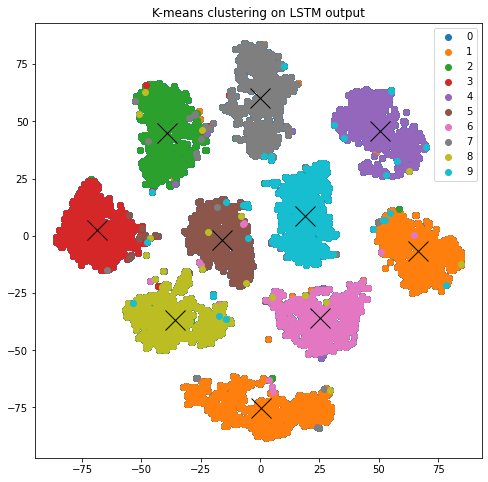

In [ ]:

#-------------------------------------------------------
#Find Kmeas on classes
#-------------------------------------------------------

kmeans_inter = KMeans(n_clusters=10, random_state=0, init='k-means++').fit(tsne_results_inter)
centroid_inter = kmeans_inter.cluster_centers_

#-------------------------------------------------------
#Categorize test output labels and define colormap
#-------------------------------------------------------

y_test_cat = np_utils.to_categorical(y_test[:50000], num_classes = 10)
color_map = numpy.argmax(y_test_cat, axis=1)

#---------------------------------------------------------
# PLOTTING
#---------------------------------------------------------
plt.figure(figsize=(8,8))
for cl in range(10):
    indices = numpy.where(color_map==cl)
    indices = indices[0]
    plt.scatter(tsne_results_inter[indices,0], tsne_results_inter[indices, 1], label=cl)
plt.plot(centroid_inter[:, 0], centroid_inter[:, 1], 'kx', markersize=20)
plt.legend()
plt.title('K-means clustering on LSTM output')
plt.show()
